In [34]:
import splitfolders


splitfolders.ratio('Datasets/Sign-Language-Digits-Dataset/', output="Datasets/Sign-Language-Digits-Dataset/Working", seed=42, ratio=(.85, 0.1,0.05)) 

Copying files: 2062 files [00:06, 298.57 files/s]


In [35]:
train_path = "Datasets/Sign-Language-Digits-Dataset/Working/train"
val_path = "Datasets/Sign-Language-Digits-Dataset/Working/val"
test_path = "Datasets/Sign-Language-Digits-Dataset/Working/test"

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

num_classes = 10
batch_size = 32
target_size = (224, 224)

In [154]:
def create_gen(train_path, val_path, test_path):
    train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
    train_gen = train_datagen.flow_from_directory(directory=train_path,   
                                                color_mode="rgb",
                                                batch_size=batch_size,
                                                target_size=target_size,
                                                shuffle=True,
                                                seed=42,
                                                class_mode='categorical')
    
    val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
    val_gen = val_datagen.flow_from_directory(directory=val_path,   
                                                color_mode="rgb",
                                                batch_size=batch_size,
                                                target_size=target_size,
                                                shuffle=True,
                                                seed=42,
                                                class_mode='categorical')

    test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
    test_gen = test_datagen.flow_from_directory(directory=test_path,   
                                                color_mode="rgb",
                                                batch_size=1,
                                                shuffle=False,
                                                target_size=target_size,
                                                class_mode='categorical')
    return (train_gen, val_gen, test_gen)

In [155]:
(train_gen, val_gen, test_gen) = create_gen(train_path, val_path, test_path)

Found 1748 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 114 images belonging to 10 classes.


In [156]:
train_gen.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [157]:
base_model = tf.keras.applications.mobilenet.MobileNet(input_shape=(224, 224, 3),
                                                  include_top=False)

for layer in base_model.layers:
    layer.trainable=False

In [158]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

In [159]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [160]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [162]:
history = model.fit(train_gen, 
                    epochs=20,
                   validation_data=val_gen)

Epoch 1/20
55/55 [==============================] - 7s 81ms/step - loss: 1.6719 - accuracy: 0.4628 - val_loss: 1.0328 - val_accuracy: 0.7700
Epoch 2/20
55/55 [==============================] - 6s 102ms/step - loss: 0.7783 - accuracy: 0.8284 - val_loss: 0.6412 - val_accuracy: 0.8600
Epoch 3/20
55/55 [==============================] - 5s 88ms/step - loss: 0.5225 - accuracy: 0.9016 - val_loss: 0.4875 - val_accuracy: 0.9000
Epoch 4/20
55/55 [==============================] - 5s 91ms/step - loss: 0.3980 - accuracy: 0.9371 - val_loss: 0.4104 - val_accuracy: 0.9000
Epoch 5/20
55/55 [==============================] - 5s 90ms/step - loss: 0.3207 - accuracy: 0.9491 - val_loss: 0.3334 - val_accuracy: 0.9450
Epoch 6/20
55/55 [==============================] - 5s 89ms/step - loss: 0.2702 - accuracy: 0.9628 - val_loss: 0.3095 - val_accuracy: 0.9250
Epoch 7/20
55/55 [==============================] - 5s 86ms/step - loss: 0.2310 - accuracy: 0.9697 - val_loss: 0.2704 - val_accuracy: 0.9450
Epoch 8/20
5

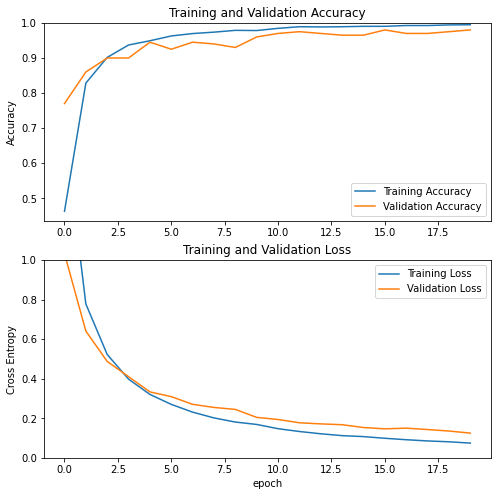

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [164]:
model.evaluate(val_gen)

7/7 [==============================] - 1s 99ms/step - loss: 0.1249 - accuracy: 0.9800


[0.12486723065376282, 0.9800000190734863]

In [165]:
model.evaluate(test_gen, batch_size=1)

114/114 [==============================] - 1s 8ms/step - loss: 0.1677 - accuracy: 0.9474: 0s - loss: 0.1721 - accura


[0.1676664501428604, 0.9473684430122375]

In [166]:
test_labels = test_gen.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [167]:
labels = list(set(test_labels))
labels = list(labels)
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [168]:
import numpy as np

predictions = model.predict(test_gen)
pred_labels = np.argmax(predictions, axis=1)
pred_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       6, 4, 4, 4, 4, 4, 4, 4, 6, 4, 7, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 2, 6, 6, 6, 6, 6, 6, 2, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9], dtype=int64)

In [173]:
accuracy = (pred_labels == test_labels).sum()/len(test_labels)
accuracy

0.9473684210526315

In [174]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [176]:
cm = confusion_matrix(test_labels, pred_labels)

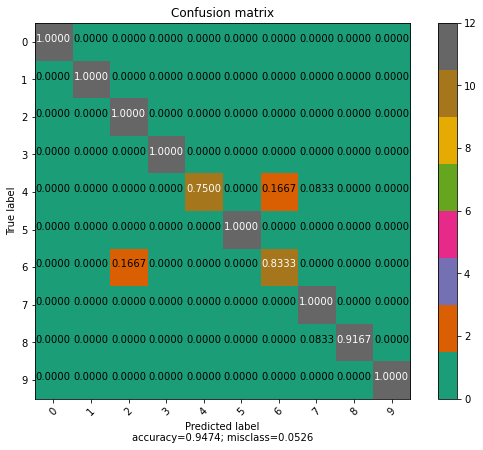

In [181]:
plot_confusion_matrix(cm, target_names=labels, cmap='Dark2')